# **Modelamiento, Evaluación e Interpretación**

## **Selección del Modelo**

En el presente apartado se trabaja la etapa de modelado (construcción, evaluación y despliegue de modelos) para extraer información valiosa de los datos, para el presente proyecto realizaremos un exploración con tres modelos diferentes de clasificación:

- Arbol de decisión
- SVM
- Regresión Logística

Y finalmente tendrá como objetivo escoger el que mejor metrica de desempeño arroje según modelo.

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Se prepara la conexión al dataset para su carga:

In [ ]:
import os
import pandas as pd
# Ruta a la carpeta en Google Drive
folder_path = "/content/drive/MyDrive/Proyecto_de_Grado/Datasets/DS_Finales"

# Cambia el directorio actual al de la carpeta
os.chdir(folder_path)

# Lista el contenido de la carpeta
!ls

'Copia de DATASET_FALLAS_-_PROCESADO_PRUEBA.xlsx'   DATASET_FALLAS_-_PROCESADO_V2.xlsx
 data_clima_preprocesada_v2.csv			    DATASET_FALLAS_-_PROCESADO.xlsx
 data_integrada_preprocesada.csv


Se cargan las librerias que serán de útilidad:

In [ ]:
#Cargamos librerías principales
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

En primera instanacia; se procede a realizar el cargue del dataset integrado y procesado mediante el NoteBook: "**Integracion_y_EDA_de_Datos.ipynb**" para su respectivo tratamiento en este NoteBook:

In [ ]:
#Cargamos el dataset
data = pd.read_csv('data_integrada_preprocesada.csv')
data

,CALARCA,MONTENEGRO,Temperatura_promedio,Precipitacion_acumulada,Velocidad_viento_promedio,SALENTO,Zona,PIJAO,BUENAVISTA,Falla
0,0,0,1.440606,-0.448038,-0.463076,0,1,0,1,0
1,0,0,1.440606,-0.448038,-0.463076,0,0,0,1,0
2,0,0,1.507753,-0.448038,-0.642771,0,1,0,1,0
3,0,0,1.507753,-0.448038,-0.642771,0,0,0,1,0
4,0,0,0.613902,1.478791,-0.433978,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
9459,0,0,0.002771,-0.448038,-0.001241,1,1,0,0,0
9460,0,0,0.226665,-0.072256,-1.572623,0,0,1,0,0
9461,0,0,-0.017163,0.847946,-1.249910,0,0,0,1,0
9462,0,0,0.218378,1.181389,-0.494829,0,1,1,0,0


## **División 70 - 30**

En este apartado se realiza la **división 70-30** del dataset **"data"** cuyo objetivo principal permitir el entrenamiento y la evaluación efectiva de modelos de clasificación. Se  separaran los datos en dos conjuntos distintos: un conjunto de entrenamiento (70%) y un conjunto de prueba (30%) en pro de mejorar la capacidad de los modelos de clasificación para generalizar a datos no vistos y se facilita la evaluación de su rendimiento:

<Axes: >

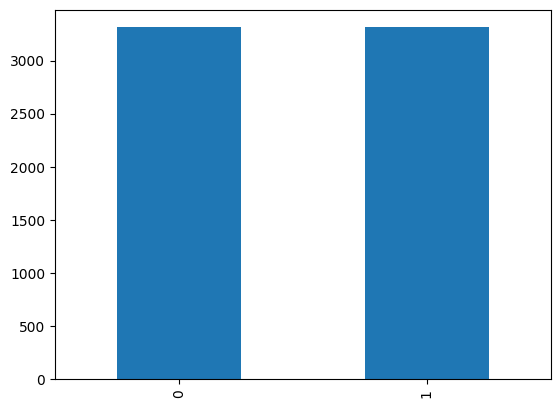

In [ ]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data.drop("Falla", axis = 1) # En X se guarda todo el dataset (Variables predictoras) salvo la variable objetivo "Falla".
Y = data['Falla'] # En Y se almacena la variable objetivo "Falla".
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) # M Se realizará un muestreo estratificado.
Y_train.value_counts().plot(kind='bar') # Graficamos los datos de entrenamiento de la variable objetivo.

# **Hiperparametrización con el 70%**

En el siguiente apartado; se procede a realizar hiperparametrización **conjunto de datos de entrenamiento (70%)** para los modelos de:

- Arbol de decisión
- SVM
- Regresión Logística

## **Hiperparametrización Arbol de Clasificación**

In [ ]:
#Hiperparametrización
from sklearn.model_selection import GridSearchCV

Se inicia la primera prueba con parametros aleatorios

In [ ]:
#  Arbol
from sklearn.tree import DecisionTreeClassifier
modelTree = DecisionTreeClassifier()

# Definir los hiperparametros
criterion=['entropy','gini'] #Indice de información
min_samples_leaf=[2,10,50,100] # Cantidad de registros por hoja
max_depth=[None, 10,20,50] #Niveles de profundidad

#Grid
param_grid = dict(criterion=criterion, min_samples_leaf=min_samples_leaf, max_depth=max_depth)
grid = GridSearchCV(estimator=modelTree, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)
grid.fit(X_train, Y_train) #70%

#Mejor modelo
modelTree= grid.best_estimator_

#Medida de evaluación del mejor modelo
medidas= pd.DataFrame(index=['f1 de la CV'])
medidas['Tree']=grid.best_score_

# Mejores párametros
print( grid.best_params_)
print(medidas)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 50}
                 Tree
f1 de la CV  0.727336


Interpretación de la primera prueba con parametros aleatorios:

* **criterion**: 'gini': Metrica que nos dá la impureza que mide cuán mezclados están los datos en un nodo. Para este caso se ha configurado el criterio para usar el índice Gini para evaluar las divisiones en el árbol.

* **max_depth**: None: Pametro que controla la profundidad máxima del árbol. Para este caso queda establecido en 'None' lo cual significa que no hay restricciones en la profundidad del árbol, lo que permite que el árbol crezca hasta que cada hoja sea pura o hasta que se alcancen otros criterios de detención.

* **min_samples_leaf**: 50: Parámetro que establece el número mínimo de muestras que debe haber en una hoja del árbol. En este caso, se ha configurado para que haya al menos 50 muestras en cada hoja.

La métrica que sigue a esta configuración de hiperparámetros es:

* **f1 de la CV 0.727336**: Esta métrica 'f1' representa la precisión y exhaustividad del modelo. En este caso, la puntuación F1 calculada en una validación cruzada (CV) es 0.727336. lo cual nos indica cuán bien el modelo de árbol de decisión con la hiperparametrización dada está realizando en términos de precisión y exhaustividad en un contexto de validación cruzada.

Segunda prueba reduciendo la escala de valores colocados anteriormente

In [ ]:
#  Arbol
from sklearn.tree import DecisionTreeClassifier
modelTree = DecisionTreeClassifier()

# Definir los hiperparametros
criterion=['entropy','gini'] #Indice de información
min_samples_leaf=[20,25,50,60] # Cantidad de registros por hoja
max_depth=[8, 10,13] #Niveles de profundidad

#Grid
param_grid = dict(criterion=criterion, min_samples_leaf=min_samples_leaf, max_depth=max_depth)
grid = GridSearchCV(estimator=modelTree, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)
grid.fit(X_train, Y_train) #70%

#Mejor modelo
modelTree= grid.best_estimator_

#Medida de evaluación del mejor modelo
medidas= pd.DataFrame(index=['f1 de la CV'])
medidas['Tree']=grid.best_score_

# Mejores párametros
print( grid.best_params_)
print(medidas)

{'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 60}
                 Tree
f1 de la CV  0.730588


Interpretación de la segunda prueba con parametros aleatorios:

* **criterion**: 'entropy': En este caso, 'entropy' se refiere a la entropía como métrica, la cual mide la impureza de un conjunto de datos y se utiliza para cuantificar la incertidumbre en la clasificación.

* **max_depth**: 13: En este caso, se ha configurado para limitar la profundidad del árbol a 13 niveles, lo cual implica que el árbol de decisión no puede crecer más allá de una profundidad de 13 niveles desde el nodo raíz.

* **min_samples_leaf**: 60: En esta configuración, se requieren al menos 60 muestras en cada hoja, número mínimo de muestras que debe haber en una hoja (nodo terminal) del árbol de decisión.

La métrica que sigue a esta configuración de hiperparámetros es:

* **f1 de la CV 0.730588**: Esta métrica 'f1' representa un calculo de la puntuación F1 en una validación cruzada (CV) en un valor aproximadamente 0.730588, lo cual indica cuán bien el modelo de árbol de decisión, con los hiperparámetros especificados.

Los cambios aplicados mejoraron discretamente, sin embargo, seguimos reduciendo la escala de valores para evidenciar si hay mejora o no:

In [ ]:
#  Arbol
from sklearn.tree import DecisionTreeClassifier
modelTree = DecisionTreeClassifier()

# Definir los hiperparametros
criterion=['entropy','gini'] #Indice de información
min_samples_leaf=[55,60,65, 70] # Cantidad de registros por hoja
max_depth=[12, 13, 14] #Niveles de profundidad

#Grid
param_grid = dict(criterion=criterion, min_samples_leaf=min_samples_leaf, max_depth=max_depth)
grid = GridSearchCV(estimator=modelTree, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)
grid.fit(X_train, Y_train) #70%

#Mejor modelo
modelTree= grid.best_estimator_

#Medida de evaluación del mejor modelo
medidas= pd.DataFrame(index=['f1 de la CV'])
medidas['Tree']=grid.best_score_

# Mejores párametros
print( grid.best_params_)
print(medidas)

{'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 60}
                 Tree
f1 de la CV  0.731058


Interpretación de la tercera prueba con parametros aleatorios:

* **criterion**: 'gini': En este caso, se ha configurado para utilizar 'gini', que se refiere al índice Gini como métrica, el cual mide la impureza en un conjunto de datos y se utiliza para evaluar la calidad de las divisiones en el árbol.

* **max_depth**: 12: En esta configuración, se ha limitado la profundidad máxima del árbol a 12 niveles. Esto significa que el árbol de decisión no puede tener más de 12 niveles de profundidad desde el nodo raíz.

* **min_samples_leaf**: 60: En esta configuración, se requieren al menos 60 muestras en cada hoja.

La métrica que sigue a esta configuración de hiperparámetros es:

* **f1 de la CV 0.731058**: En este caso se ha calculado la puntuación F1 en una validación cruzada (CV) y su valor es aproximadamente 0.731058, lo cual indica cuán bien el modelo de árbol de decisión, con los hiperparámetros especificados, está realizando en términos de equilibrio entre precisión y exhaustividad durante la validación cruzada.

Observamos que hubo una leve mejora en la tercera prueba, en menor proporción que las anteriores, por ende se seleccionan estos últimos hiperparametros:

- 'criterion': 'gini'
- 'max_depth': 12
- 'min_samples_leaf': 60
obteniendo un f1 score de 0.731058

A continuación gráficamos nuestro arbol según mejor hiperparametrización obtenida:

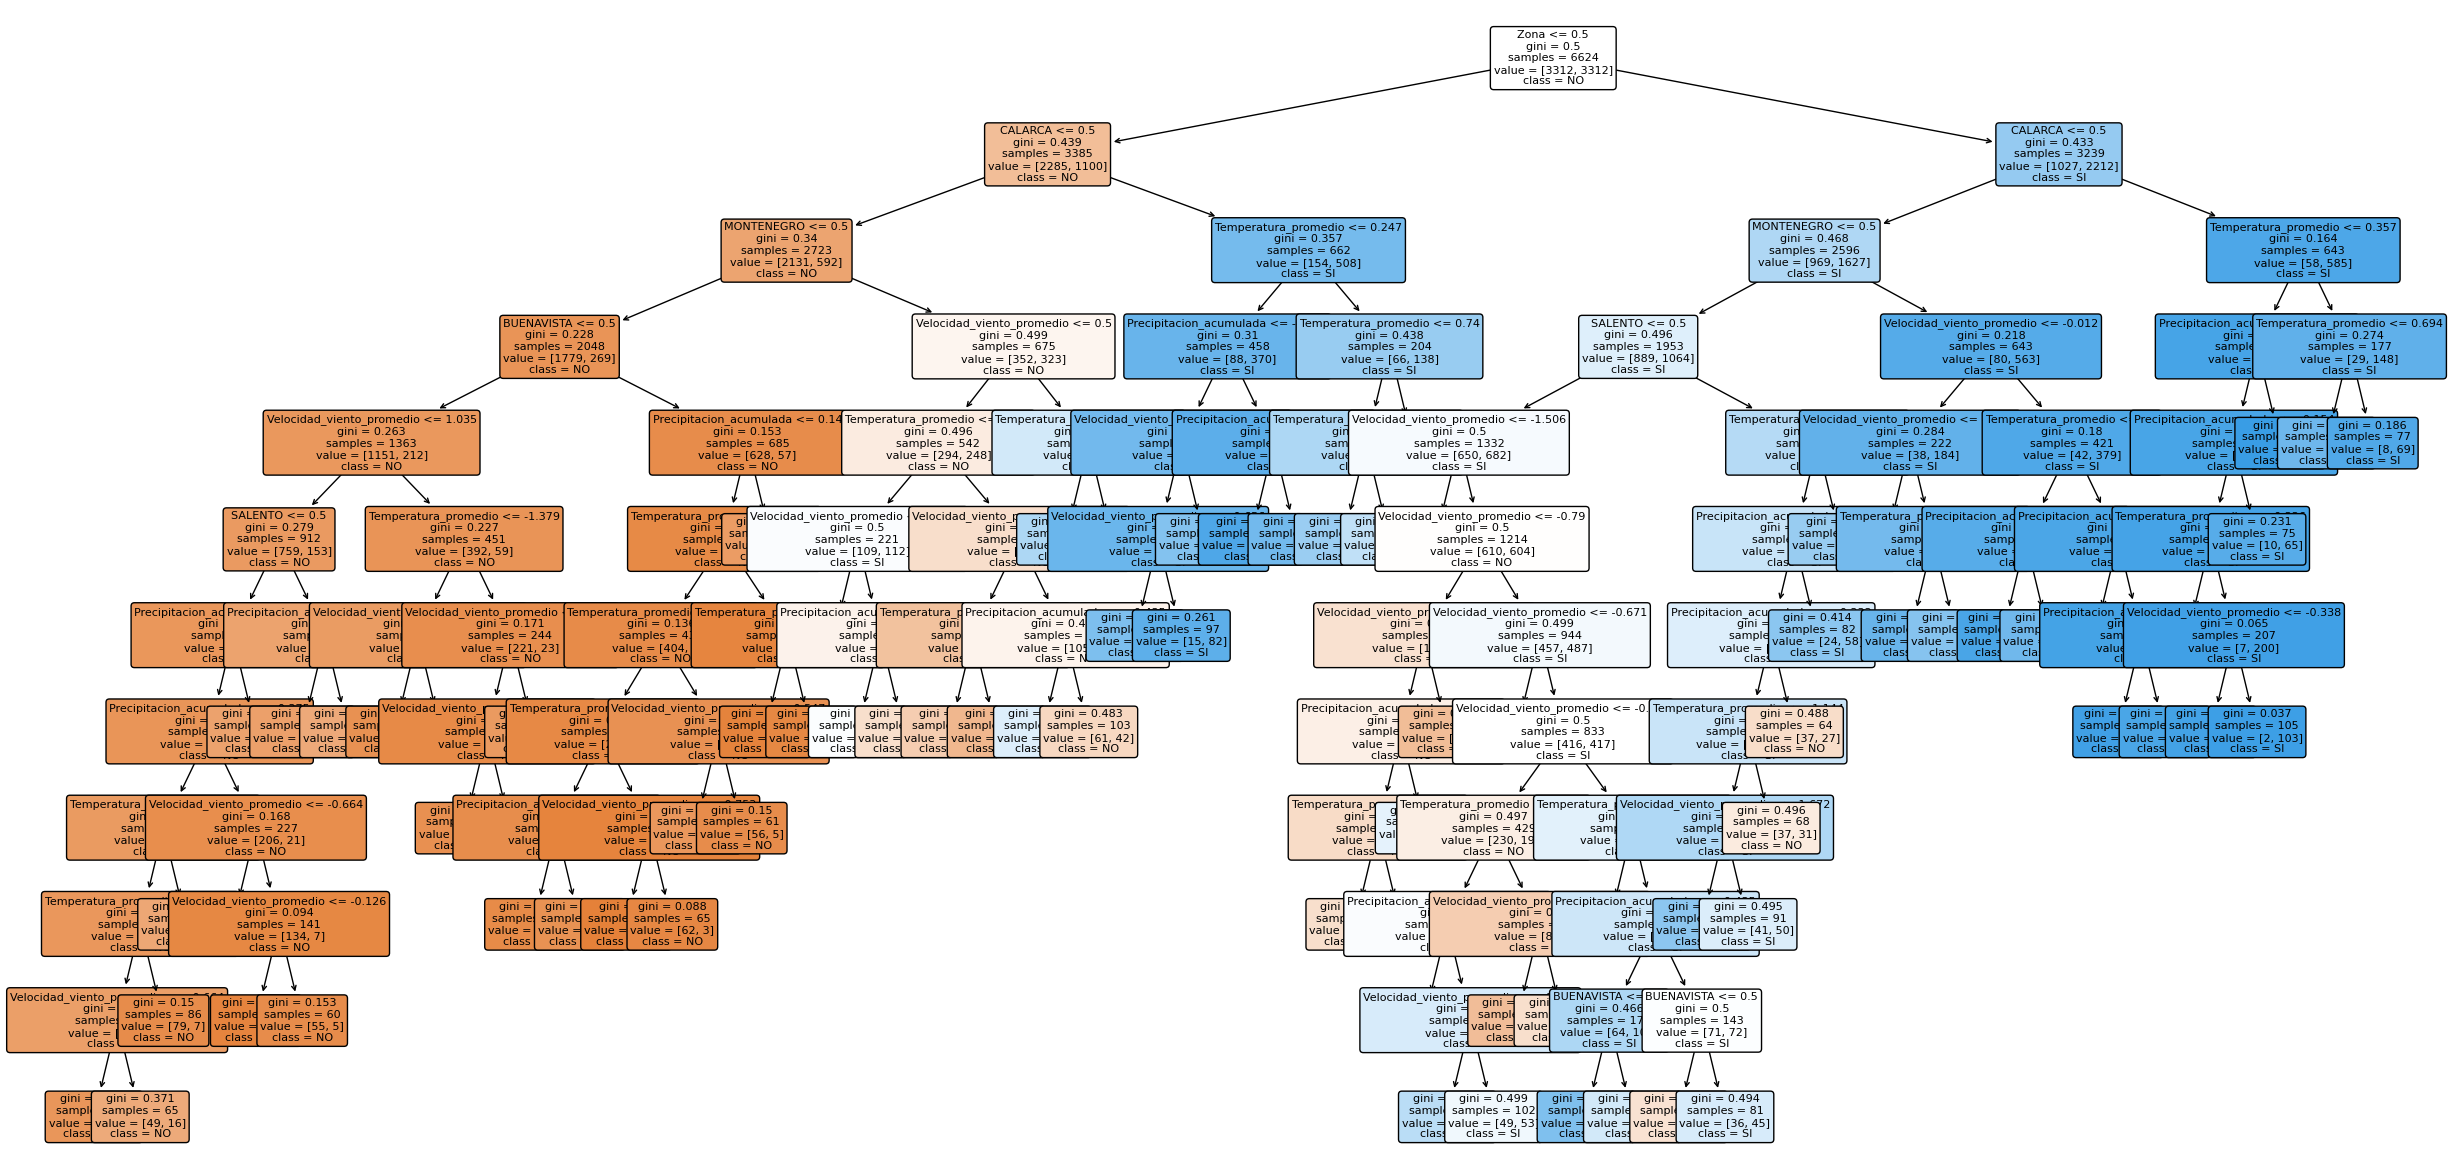

In [ ]:
#Mejor modelo
from sklearn.tree import plot_tree
plt.figure(figsize=(30,15))
plot_tree(modelTree, feature_names=X_train.columns.values, class_names=['NO', 'SI'], rounded=True, filled=True, fontsize=8)
plt.show()

## **Hiperparametrización SVM para Clasificación**

Iniciamos la primera prueba con parametros aleatorios:

In [ ]:
#SVM
from sklearn.svm import SVC
modelSVM = SVC()

# Definir los hiperparametros
C=[0.1,1,10] #Margen blando
kernel=['linear'] #'linear', 'poly', 'rbf', 'sigmoid'
gamma=['scale']

#Grid
param_grid = dict(C=C, kernel=kernel,gamma=gamma)
grid = GridSearchCV(estimator=modelSVM, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)
grid.fit(X_train, Y_train)

#Mejor modelo
modelSVM= grid.best_estimator_

#Medida de evaluación del mejor modelo
medidas= pd.DataFrame(index=['f1 de la CV'])
medidas['SVM']=grid.best_score_

# Mejores párametros
print( grid.best_params_)

print(medidas)

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
                  SVM
f1 de la CV  0.730119


Interperación de la primera prueba con parametros Aleatorios y métrica asociada:

**'C': 0.1**: Un valor tan bajo como 0.1 del parámetro 'C' que un SVM controla el término de regularización, permite que el modelo sea más tolerante a errores en el conjunto de entrenamiento, lo que puede resultar en una frontera de decisión más suave.
NOTA: Tener presente que un valor más alto de 'C' penalizará más los errores en el conjunto de entrenamiento, lo que puede resultar en una frontera de decisión más ajustada.

**'gamma': 'scale'**: El parámetro 'gamma' afecta la forma en que el modelo considera la influencia de cada ejemplo de entrenamiento en la construcción de la frontera de decisión. En este caso el valor: 'Scale' es una opción común que significa que 'gamma' se establece en 1 / (número de características * varianza de los datos). Esto ayuda a adaptar 'gamma' en función de la escala y la variabilidad de los datos.

**'kernel': 'linear'**: En este caso el parámetro 'kernel' que especifica el tipo de kernel a utilizar en el SVM se ha configurado para utilizar un kernel lineal, lo que significa que el modelo intentará encontrar una frontera de decisión lineal para separar las clases en el espacio de características.

La métrica que sigue a esta configuración de hiperparámetros es:

**f1 de la CV 0.730119**: En este caso se ha calculado la puntuación F1 en una validación cruzada (CV) y su valor es aproximadamente 0.730119, lo que indica cuán bien el modelo SVM, con los hiperparámetros especificados, está realizando en términos de equilibrio entre precisión y exhaustividad durante la validación cruzada.

Intentamos con otro Kernel

In [ ]:
#SVM
from sklearn.svm import SVC
modelSVM = SVC()

# Definir los hiperparametros
C=[0.1,1,10] #Margen blando
kernel=['rbf'] #'linear', 'poly', 'rbf', 'sigmoid'
gamma=['scale']

#Grid
param_grid = dict(C=C, kernel=kernel,gamma=gamma)
grid = GridSearchCV(estimator=modelSVM, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)
grid.fit(X_train, Y_train)

#Mejor modelo
modelSVM= grid.best_estimator_

#Medida de evaluación del mejor modelo
medidas= pd.DataFrame(index=['f1 de la CV'])
medidas['SVM']=grid.best_score_

# Mejores párametros
print( grid.best_params_)

print(medidas)

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
                  SVM
f1 de la CV  0.731466


Interperación de la segunda prueba con parametro Kernel: **"rbf"** Aleatorios y métrica asociada:

* **'C': 1**: En este caso, se ha configurado 'C' que controla el término de regularización nos arroja un valor de 1, lo cual quiere decir que por ser un valor más alto penaliza más los errores en el conjunto de entrenamiento, lo que puede resultar en una frontera de decisión más ajustada.

* **'gamma': 'scale'**: En este caso (Al igual que el caso anterior); el parámetro 'gamma' que afecta la forma en que el modelo considera la influencia de cada ejemplo de entrenamiento en la construcción de la frontera de decisión no da el valor de: 'Scale', que es una opción común que significa que 'gamma' se establece en 1 / (número de características * varianza de los datos). Esto ayuda a adaptar 'gamma' en función de la escala y la variabilidad de los datos.

* **'kernel': 'rbf'**: El parámetro 'kernel' seleccionado arbitrariamente para la prueba con valor radial (RBF), el cuál no lineal que es muy efectivo para problemas de clasificación en los que la frontera de decisión no es lineal. Permite al SVM encontrar fronteras de decisión más complejas en el espacio de características.

La métrica que sigue a esta configuración de hiperparámetros es:

* **f1 de la CV 0.731466**: En este caso se ha calculado la puntuación F1 en una validación cruzada (CV) y su valor es aproximadamente 0.731466. Esto indica cuán bien el modelo SVM, con los hiperparámetros especificados y el kernel RBF, está realizando en términos de equilibrio entre precisión y exhaustividad durante la validación cruzada.

Mejoró el resultado de acuerdo al anterior, intentamos con otro Kernel **"poly"**:

In [ ]:
#SVM
from sklearn.svm import SVC
modelSVM = SVC()

# Definir los hiperparametros
C=[0.1,1,10] #Margen blando
kernel=['poly'] #'linear', 'poly', 'rbf', 'sigmoid'
gamma=['scale']

#Grid
param_grid = dict(C=C, kernel=kernel,gamma=gamma)
grid = GridSearchCV(estimator=modelSVM, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)
grid.fit(X_train, Y_train)

#Mejor modelo
modelSVM= grid.best_estimator_

#Medida de evaluación del mejor modelo
medidas= pd.DataFrame(index=['f1 de la CV'])
medidas['SVM']=grid.best_score_

# Mejores párametros
print( grid.best_params_)

print(medidas)

{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
                  SVM
f1 de la CV  0.727423


Interprtación de la segunda prueba con parametro Kernel: **"poly"** Aleatorios y métrica asociada:

* **'C': 10**: En este caso, el parámetro "C" que controla el término de regularización se ha configurado con un valor de 10, lo cual significa que mucho más los errores en el conjunto de entrenamiento, y lo que puede resultar en una frontera de decisión más ajustada.

* **'gamma': 'scale'**: Para este caso; el parámetro 'gamma' que afecta la forma en que el modelo considera la influencia de cada ejemplo de entrenamiento en la construcción de la frontera de decisión se ha configurado en el valor: 'Scale' el cuál es una opción común que significa que 'gamma' se establece en 1 / (número de características * varianza de los datos). Esto ayuda a adaptar 'gamma' en función de la escala y la variabilidad de los datos.

* **'kernel': 'poly'**: En este caso, el parámetro 'kernel' que especifica el tipo de kernel a utilizar en el SVM se ha seleccionado en el valor de kernel polinómico (poly). El kernel polinómico permite al SVM encontrar fronteras de decisión no lineales utilizando funciones polinómicas.

La métrica que sigue a esta configuración de hiperparámetros es:

* **f1 de la CV 0.727423**: En este caso se ha calculado la puntuación F1 en una validación cruzada (CV) y su valor es aproximadamente 0.727423. Esto indica cuán bien el modelo SVM, con los hiperparámetros especificados y el kernel polinómico, está realizando en términos de equilibrio entre precisión y exhaustividad durante la validación cruzada.

Intentamos con el Kernel 'sigmoid' en una tercer prueba:

In [ ]:
#SVM
from sklearn.svm import SVC
modelSVM = SVC()

# Definir los hiperparametros
C=[9, 10, 11] #Margen blando
kernel=['sigmoid'] #'linear', 'poly', 'rbf', 'sigmoid'
gamma=['scale']

#Grid
param_grid = dict(C=C, kernel=kernel,gamma=gamma)
grid = GridSearchCV(estimator=modelSVM, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)
grid.fit(X_train, Y_train)

#Mejor modelo
modelSVM= grid.best_estimator_

#Medida de evaluación del mejor modelo
medidas= pd.DataFrame(index=['f1 de la CV'])
medidas['SVM']=grid.best_score_

# Mejores párametros
print( grid.best_params_)

print(medidas)

{'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
                  SVM
f1 de la CV  0.642068


Interprtación de la segunda prueba con parametro Kernel: **"sigmoid"** Aleatorios y métrica asociada:

* **'C': 10**: Al igual que en el caso anterior; en este caso, el parámetro "C" que controla el término de regularización se ha configurado con un valor de 10, lo cual significa que mucho más los errores en el conjunto de entrenamiento, y lo que puede resultar en una frontera de decisión más ajustada.

* **'gamma': 'scale'**: Al igual que el caso anterior; para este caso; el parámetro 'gamma' que afecta la forma en que el modelo considera la influencia de cada ejemplo de entrenamiento en la construcción de la frontera de decisión se ha configurado en el valor: 'Scale' el cuál es una opción común que significa que 'gamma' se establece en 1 / (número de características * varianza de los datos). Esto ayuda a adaptar 'gamma' en función de la escala y la variabilidad de los datos.

* **'kernel': 'sigmoid'**: Para este caso se ha seleccionado arbitrariamente el kernel sigmoid, el cual utiliza funciones sigmoideas para construir la frontera de decisión, tipo de kernel que es útil en problemas de clasificación no lineal, aunque es menos común que los kernels lineal, polinómico o radial (RBF).

La métrica que sigue a esta configuración de hiperparámetros es:

* **f1 de la CV 0.642068**: Para este caso se ha calculado la puntuación F1 en una validación cruzada (CV) y su valor es aproximadamente 0.642068. Valor que indica cuán bien el modelo SVM, con los hiperparámetros especificados y el kernel sigmoid, está realizando en términos de equilibrio entre precisión y exhaustividad durante la validación cruzada.

Con base a lo anterior; se logra identificar que el mejor kernel es el **rbf**, por tl razón intentamos acotar los parametros con este:

In [ ]:
#SVM
from sklearn.svm import SVC
modelSVM = SVC()

# Definir los hiperparametros
C=[8,10, 12] #Margen blando
kernel=['rbf'] #'linear', 'poly', 'rbf', 'sigmoid'
gamma=['auto']

#Grid
param_grid = dict(C=C, kernel=kernel,gamma=gamma)
grid = GridSearchCV(estimator=modelSVM, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)
grid.fit(X_train, Y_train)

#Mejor modelo
modelSVM= grid.best_estimator_

#Medida de evaluación del mejor modelo
medidas= pd.DataFrame(index=['f1 de la CV'])
medidas['SVM']=grid.best_score_

# Mejores párametros
print( grid.best_params_)

print(medidas)

{'C': 12, 'gamma': 'auto', 'kernel': 'rbf'}
                  SVM
f1 de la CV  0.733649


En este nuevo caso; la hiperparametrización dada se refiere a la configuración de un modelo de SVM de clasificación con un kernel radial (RBF) y gamma calculado automáticamente. La métrica F1 calculada en la validación cruzada muestra su rendimiento en términos de precisión y exhaustividad en un conjunto de datos específico. La puntuación F1 de aproximadamente 0.733649 sugiere que este modelo de SVM con estos hiperparámetros está funcionando bien en la tarea de clasificación.

In [ ]:
#SVM
from sklearn.svm import SVC
modelSVM = SVC()

# Definir los hiperparametros
C=[11,12, 13] #Margen blando
kernel=['rbf'] #'linear', 'poly', 'rbf', 'sigmoid'
gamma=['scale']

#Grid
param_grid = dict(C=C, kernel=kernel,gamma=gamma)
grid = GridSearchCV(estimator=modelSVM, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)
grid.fit(X_train, Y_train)

#Mejor modelo
modelSVM= grid.best_estimator_

#Medida de evaluación del mejor modelo
medidas= pd.DataFrame(index=['f1 de la CV'])
medidas['SVM']=grid.best_score_

# Mejores párametros
print( grid.best_params_)

print(medidas)

{'C': 13, 'gamma': 'scale', 'kernel': 'rbf'}
                  SVM
f1 de la CV  0.726177


En este nuevo caso; se tiene la configuración de un modelo de SVM de clasificación con un kernel radial (RBF), gamma= "scale" en el cual la métrica F1 calculada es de aproximadamente 0.726177 sugiere que este modelo de SVM con estos hiperparámetros está funcionando bien en la tarea de clasificación.

De las pruebas anterior concluimos que para el modelo de clasificación SVM los mejores hiperparametros son:

- **C: 12**
- **gamma: 'auto'**
- **kernel: 'rbf'**

Obteniendo un f1 score de  **0.733649**

## **Hiperparametrización para Regresión Logística**

Primer caso; iniciamos con parametros aleatorios:

In [ ]:
from sklearn.linear_model import LogisticRegression

# Crear un modelo de regresión logística
modelLogistic = LogisticRegression()

# Definir los hiperparámetros
penalty = ['l1', 'l2']  # Tipo de penalización
C = [0.001, 0.01, 0.1, 1, 10, 100]  # Parámetro de regularización

# Crear un diccionario con los hiperparámetros
param_grid = {'penalty': penalty, 'C': C}

# Crear un objeto GridSearchCV
grid = GridSearchCV(estimator=modelLogistic, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)

# Ajustar el modelo de regresión logística
grid.fit(X_train, Y_train)

# Mejor modelo
modelLogistic = grid.best_estimator_

# Medida de evaluación del mejor modelo
medidas = pd.DataFrame(index=['f1 de la CV'])
medidas['Logistic'] = grid.best_score_

# Mejores párametros
print(grid.best_params_)
print(medidas)

{'C': 0.01, 'penalty': 'l2'}
             Logistic
f1 de la CV  0.731908


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

Intepretación del resultado obtenido para esteprimer caso:

* **'C': 0.01**: En este caso, se ha configurado 'C' que controla la fuerza de la regularización con un valor de 0.01. Valor que por ser tan bajo aumenta la regularización, lo que significa que el modelo es más penalizado por los coeficientes grandes. Esto ayuda a prevenir el sobreajuste.

* **'penalty': 'l2'**: En este caso; en el parámetro que especifica el tipo de regularización que se aplica al modelo se ha seleccionado un 'l2', que se refiere a la regularización de norma L2. La regularización L2 agrega un término que penaliza los coeficientes grandes en la función de costo, lo que ayuda a prevenir el sobreajuste y a mejorar la generalización del modelo.

La métrica que sigue a esta configuración de hiperparámetros es:

* **f1 de la CV 0.731908**: En este caso, se ha calculado la puntuación F1 en una validación cruzada (CV) y su valor es aproximadamente 0.731908. Esto indica cuán bien el modelo de Regresión Logística, con los hiperparámetros especificados, está realizando en términos de equilibrio entre precisión y exhaustividad durante la validación cruzada.

En un segundo caso reducimos el rango de variables para encontrar los mejores hiperparametros:

In [ ]:
from sklearn.linear_model import LogisticRegression

# Crear un modelo de regresión logística
modelLogistic = LogisticRegression()

# Definir los hiperparámetros
penalty = ['l1', 'l2']  # Tipo de penalización
C = [0.02, 0.01, 0.03]  # Parámetro de regularización

# Crear un diccionario con los hiperparámetros
param_grid = {'penalty': penalty, 'C': C}

# Crear un objeto GridSearchCV
grid = GridSearchCV(estimator=modelLogistic, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)

# Ajustar el modelo de regresión logística
grid.fit(X_train, Y_train)

# Mejor modelo
modelLogistic = grid.best_estimator_

# Medida de evaluación del mejor modelo
medidas = pd.DataFrame(index=['f1 de la CV'])
medidas['Logistic'] = grid.best_score_

# Mejores párametros
print(grid.best_params_)
print(medidas)

{'C': 0.02, 'penalty': 'l2'}
             Logistic
f1 de la CV  0.732233


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

En este segundo caso la hiperparametrización dada se refiere a la configuración de un modelo de Regresión Logística con regularización **L2** y un valor de 'C' de **0.02**. La métrica F1 calculada en la validación cruzada muestra su rendimiento en términos de precisión y exhaustividad en un conjunto de datos específico. La puntuación F1 de aproximadamente 0.732233 sugiere que este modelo de Regresión Logística con estos hiperparámetros está funcionando bien en la tarea de clasificación.

En el anterior caso hubo una leve mejora, pero intentamos reducir más los valores en este tercer caso:

In [ ]:
from sklearn.linear_model import LogisticRegression

# Crear un modelo de regresión logística
modelLogistic = LogisticRegression()

# Definir los hiperparámetros
penalty = ['l1', 'l2']  # Tipo de penalización
C = [0.005, 0.01, 0.02, 0.03]  # Parámetro de regularización

# Crear un diccionario con los hiperparámetros
param_grid = {'penalty': penalty, 'C': C}

# Crear un objeto GridSearchCV
grid = GridSearchCV(estimator=modelLogistic, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)

# Ajustar el modelo de regresión logística
grid.fit(X_train, Y_train)

# Mejor modelo
modelLogistic = grid.best_estimator_

# Medida de evaluación del mejor modelo
medidas = pd.DataFrame(index=['f1 de la CV'])
medidas['Logistic'] = grid.best_score_

# Mejores párametros
print(grid.best_params_)
print(medidas)

{'C': 0.02, 'penalty': 'l2'}
             Logistic
f1 de la CV  0.732233


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

En este tercer caso; la hiperparametrización dada se refiere a la configuración de un modelo de Regresión Logística con regularización L2 y un valor de 'C' de 0.02. La métrica F1 calculada en la validación cruzada muestra su rendimiento en términos de precisión y exhaustividad en un conjunto de datos específico. La puntuación F1 de aproximadamente 0.732233 sugiere que este modelo de Regresión Logística con estos hiperparámetros está funcionando bien en la tarea de clasificación.

Por lo anterior concluimos que para el modelo de regresión logística los mejores parametros encontrados en las pruebas realizadas fueron:

- **C: 0.02**
- **penalty: l2**

Obteniendo un f1 score de **0.732233**

 ## **Evaluación de los mejores modelos con el 30%**

En este apartado realizaremos la evaluación de modelos con el 30% de los datos, proceso esencial para medir y comparar el rendimiento de los diferentes hiperparametrizados en el aparatado anterior y determinar cuál es el más adecuado para abordar nuestro problema específico de predicción de fallas. Cabe mencionar que este proceso es fundamental para garantizar que los modelos sean útiles y confiables en la toma de decisiones basadas en datos.







### **Evaluamos el arbol de clasificación**

In [1]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

Y_pred = modelTree.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['NO', 'SI'])
disp.plot()
plt.show()

# Precisión, Recall, F1, Exactitud
print(classification_report(Y_test, Y_pred, target_names=['NO', 'SI']))

# Curva ROC
RocCurveDisplay.from_estimator(modelTree, X_test, Y_test)
plt.show()


NameError: ignored

### **Evaluamos el SVM**

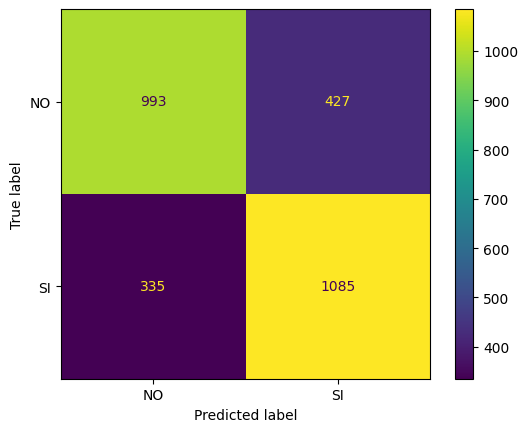

              precision    recall  f1-score   support

          NO       0.75      0.70      0.72      1420
          SI       0.72      0.76      0.74      1420

    accuracy                           0.73      2840
   macro avg       0.73      0.73      0.73      2840
weighted avg       0.73      0.73      0.73      2840



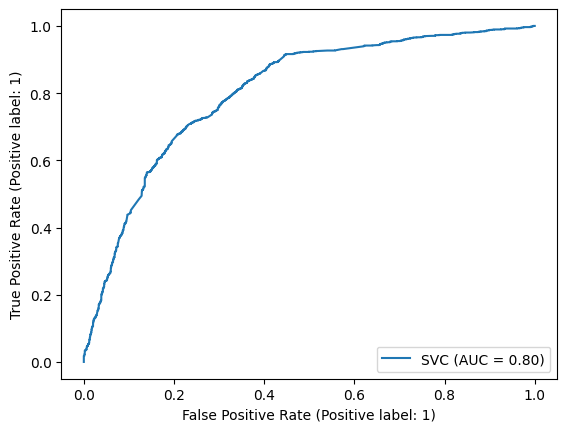

In [ ]:
#Evaluación de SVM
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, classification_report
import matplotlib.pyplot as plt

Y_pred = modelSVM.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['NO', 'SI'])
disp.plot()
plt.show()

# Precisión, Recall, F1, Exactitud
print(classification_report(Y_test, Y_pred, target_names=['NO', 'SI']))

# Curva ROC
RocCurveDisplay.from_estimator(modelSVM, X_test, Y_test)
plt.show()


### **Evaluamos la regresión logística**

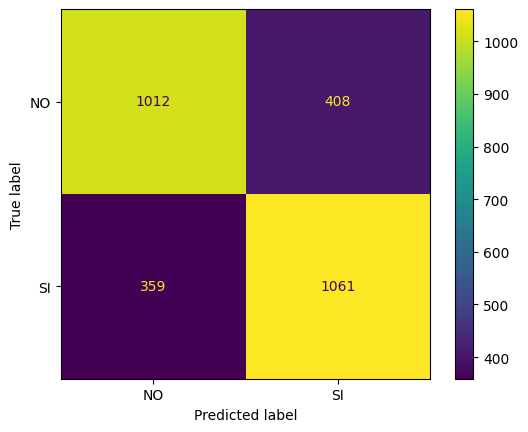

              precision    recall  f1-score   support

          NO       0.74      0.71      0.73      1420
          SI       0.72      0.75      0.73      1420

    accuracy                           0.73      2840
   macro avg       0.73      0.73      0.73      2840
weighted avg       0.73      0.73      0.73      2840



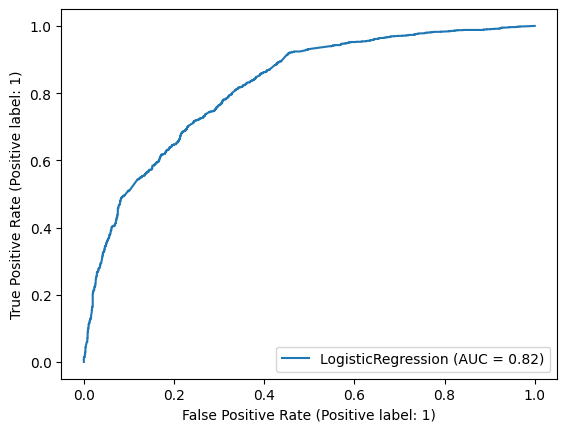

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, classification_report
import matplotlib.pyplot as plt


Y_pred = modelLogistic.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['NO', 'SI'])
disp.plot()
plt.show()

# Precisión, Recall, F1, Exactitud
print(classification_report(Y_test, Y_pred, target_names=['NO', 'SI']))

# Curva ROC
RocCurveDisplay.from_estimator(modelLogistic, X_test, Y_test)
plt.show()


En la busqueda del mejor modelo para implementar en las etapas de entrenamiento con los hiperparametros los mejores resultados de cada uno fueron los siguientes, midiendolos con la metrica f1-score:

- Arbol: 0.731058
- SVM: 0.733649
- Regresión logística: 0.732233

Obteniendo mejor desempeño el SVM.

Al momento de evaluar estos modelos con el set de test observamos que cada uno obtuvo un f1-score de 0.73, pero al evaluarlos con la metrica AUC-ROC se obtuvo lo siguiente:

- Arbol: 0.82
- SVM: 0.80
- Regresión logística: 0.82

Para este caso el menor desempeño lo obtuvo el SVM.




# **Medida de Calidad del Modelo**

De acuerdo a la busqueda de hiperparámetros que realizamos anteriormente, a continuación procedemos a su aplicación para evaluar y seleccionar el modelo que mejor desempeño arroje, teniendo como base la metrica **RECAll**, toda vez que es la que nos mide las predicciones positivas (Si Falla) sobre todas los casos positivos reales; lo anterior debido a que es más perjudicial que el modelo no detecte una falla real a que prediga una falla y realmente no suceda:

## **Validación cruzada**

- ### **Arbol de clasificación:**

In [ ]:
#Método árboles de clasificación con validación cruzada
from sklearn import tree
from sklearn.model_selection import cross_validate
X = data.drop("Falla", axis = 1)
Y = data['Falla']
model = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=60, max_depth=12)
scores = cross_validate(model, X, Y, cv=10, scoring=('f1_weighted', 'accuracy','precision_weighted', 'recall_weighted'), return_train_score=False)
print('Accuracy:', scores['test_accuracy'].mean())
print('Precision:', scores['test_precision_weighted'].mean())
print('Recall:', scores['test_recall_weighted'].mean())
print('f1:', scores['test_f1_weighted'].mean())

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.6005762048172597
Precision: 0.5531963645610077
Recall: 0.6005762048172597
f1: 0.5470182035662655


Interpretación de la validación cruzada del Arbol de Clasficación:

* **Accuracy (Exactitud):** Métrica que mide la proporción de predicciones correctas en el conjunto de datos. En este caso, el valor de exactitud es aproximadamente 0.6006, lo que significa que el modelo acertó en el 60.06% de las predicciones en promedio durante la validación cruzada. Cabe mencionar que esta métrica es útil para medir la tasa global de predicciones correctas.

* **Precision (Precisión)**: Métrica que da la proporción de predicciones positivas que fueron correctas. En este caso, la precisión es aproximadamente 0.5532, lo que significa que el 55.32% de las predicciones positivas realizadas por el modelo durante la validación cruzada fueron correctas. Cabe mencionar que esta métrica es útil cuando se desea minimizar los falsos positivos.

* **Recall (Recall o Sensibilidad)**: Métrica que mide la proporción de instancias reales positivas que se capturan correctamente. En este caso, el valor de recall es igual a la exactitud, es decir, aproximadamente 0.6006. Esto significa que el modelo capturó correctamente el 60.06% de todas las instancias reales positivas en promedio durante la validación cruzada. Cabe mencionar que el recall es útil cuando se desea minimizar los falsos negativos.

* **F1-Score (Puntuación F1)**: Métrica que combina tanto la precisión como el recall en una sola métrica. Es útil cuando se busca un equilibrio entre precisión y recall. En este caso, el valor del F1-score es aproximadamente 0.5470, lo que indica que el modelo tiene un equilibrio aceptable entre precisión y recall durante la validación cruzada.

- ### **SVM:**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

# Preparar los datos
X = data.drop("Falla", axis=1)
Y = data['Falla']

#hiperparámetros específicos
modelSVM = SVC(C=12, gamma='auto', kernel='rbf')

# Aplicar validación cruzada
scoresSVM = cross_validate(modelSVM, X, Y, cv=10, scoring=('f1_weighted', 'accuracy', 'precision_weighted', 'recall_weighted'), return_train_score=False)

# Imprimir los resultados
print('SVM Accuracy:', scoresSVM['test_accuracy'].mean())
print('SVM Precision:', scoresSVM['test_precision_weighted'].mean())
print('SVM Recall:', scoresSVM['test_recall_weighted'].mean())
print('SVM F1:', scoresSVM['test_f1_weighted'].mean())


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 0.5776422038215707
SVM Precision: 0.5675704536820703
SVM Recall: 0.5776422038215707
SVM F1: 0.5234284753972862


Interpretación de la validación cruzada del SVM:

* **Accuracy (Exactitud)**: En este caso, el valor de exactitud es aproximadamente 0.5776, lo que significa que el modelo acertó en el 57.76% de las predicciones en promedio durante la validación cruzada.

* **Precision (Precisión)**: En este caso, la precisión es aproximadamente 0.5676, lo que significa que el 56.76% de las predicciones positivas realizadas por el modelo durante la validación cruzada fueron correctas.

* **Recall (Recall o Sensibilidad)**: En este caso, el valor de recall es igual a la exactitud, es decir, aproximadamente 0.5776. Esto significa que el modelo capturó correctamente el 57.76% de todas las instancias reales positivas en promedio durante la validación cruzada.

* **F1-Score (Puntuación F1)**: En este caso, el valor del F1-score es aproximadamente 0.5234, lo que indica que el modelo tiene un equilibrio entre precisión y recall durante la validación cruzada.

- ### **Regresión Logística:**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

# Preparar los datos
X = data.drop("Falla", axis=1)
Y = data['Falla']

# Configurar el modelo de Regresión Logística con hiperparámetros específicos
modelLR = LogisticRegression(C=0.02, penalty='l2')

# Aplicar validación cruzada
scoresLR = cross_validate(modelLR, X, Y, cv=10, scoring=('f1_weighted', 'accuracy', 'precision_weighted', 'recall_weighted'), return_train_score=False)

# Imprimir los resultados
print('Logistic Regression Accuracy:', scoresLR['test_accuracy'].mean())
print('Logistic Regression Precision:', scoresLR['test_precision_weighted'].mean())
print('Logistic Regression Recall:', scoresLR['test_recall_weighted'].mean())
print('Logistic Regression F1:', scoresLR['test_f1_weighted'].mean())


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Accuracy: 0.5843019348962228
Logistic Regression Precision: 0.5341903412420712
Logistic Regression Recall: 0.5843019348962228
Logistic Regression F1: 0.5265964738331671


Interpretación de la validación cruzada de la Regresión Logística:

* **Accuracy (Exactitud)**: En este caso, el valor de exactitud es aproximadamente 0.5843, lo que significa que el modelo acertó en el 58.43% de las predicciones en promedio durante la validación cruzada.

* **Precision (Precisión)**: En este caso, la precisión es aproximadamente 0.5342, lo que significa que el 53.42% de las predicciones positivas realizadas por el modelo durante la validación cruzada fueron correctas.

* **Recall (Recall o Sensibilidad)**: En este caso, el valor de recall es igual a la exactitud, es decir, aproximadamente 0.5843. Esto significa que el modelo capturó correctamente el 58.43% de todas las instancias reales positivas en promedio durante la validación cruzada.

* **F1-Score (Puntuación F1)**: En este caso, el valor del F1-score es aproximadamente 0.5266, lo que indica que el modelo tiene un equilibrio aceptable entre precisión y recall durante la validación cruzada.

# **Guardamos los modelos**

Teniendo en que cuenta que la función cross_validate esta entrenando modelos internamente (uno por cada partición de validación cruzada) para realizar estimaciones de rendimiento, pero no los devuelve para su uso posterior, se decide entrenar un modelo final de forma independiente y guardarlo:

- ## **Entrenamiento final y guardado del modelo arbol de clasificación:**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pickle

# Configurar y entrenar el modelo de Árbol de Clasificación
modelTree_final = DecisionTreeClassifier(criterion='gini', min_samples_leaf=60, max_depth=12)
modelTree_final.fit(X, Y)

# Guardar el modelo de Árbol de Clasificación
filename_tree = 'modelo_arbol_clasificacion.pkl'
with open(filename_tree, 'wb') as file:
    pickle.dump(modelTree_final, file)

print("Modelo de Árbol de Clasificación guardado con éxito.")


Modelo de Árbol de Clasificación guardado con éxito.


- ## **Entrenamiento final y guardado del modelo SVM:**

In [ ]:
from sklearn.svm import SVC
import pickle

# Configurar y entrenar el modelo SVM
modelSVM_final = SVC(C=12, gamma='auto', kernel='rbf')
modelSVM_final.fit(X, Y)

# Guardar el modelo SVM
filename_svm = 'modelo_svm.pkl'
with open(filename_svm, 'wb') as file:
    pickle.dump(modelSVM_final, file)

print("Modelo SVM guardado con éxito.")


Modelo SVM guardado con éxito.


- ## **Entrenamiento final y guardado del modelo regresión logística:**

In [ ]:
from sklearn.linear_model import LogisticRegression
import pickle

# Configuración del modelo y entrenamiento con todos los datos
modelLR_final = LogisticRegression(C=0.02, penalty='l2')
modelLR_final.fit(X, Y)

# Guardar el modelo entrenado
filename = 'modelo_regresion_logistica.pkl'
with open(filename, 'wb') as file:
    pickle.dump(modelLR_final, file)

print("Modelo de Regresión Logística guardado con éxito.")


Modelo de Regresión Logística guardado con éxito.


# **Despliegue**

**En** el sisguiente apartado se realiza el despliegue de modelos, despliegue mediante el cual se busca transformar la información en acciones concretas y valiosas para la toma de desiciones. Para realizar el despliegue de los modelos se ingresan datos que no fueron utilizados para el entrenamiento, en este caso es información de julio 2023 (Datos que incluye información de fallas y del clima de IDEAM) con un total de **20 registros**.

En primera instanacia cargamos la data futura (Data a predecir):

In [ ]:
#Predicción de datos futuros
data_fut = pd.read_excel("DATA_VALIDACIÓN_MODELO.xlsx", sheet_name=0)
data_fut.head()

,Municipio,Zona,Temperatura_promedio,Precipitacion_acumulada,Velocidad_viento_promedio
0,BUENAVISTA,R,16.53364,0.0,0.000000
1,BUENAVISTA,R,26.20307,0.0,1.186728
2,BUENAVISTA,R,30.38207,0.0,1.664194
3,BUENAVISTA,R,21.91983,8.7,0.537382
4,BUENAVISTA,R,26.90000,0.0,0.000000


Se realiza un breve ETL a la data futura para poder trabajar la misma en el despliegue de los modelos:

* Se codifican los valores del campo Municipio, se elimina la columna original de "Municipio" y se agregan los campos dummies codificados.
* Se codifican los calores del campo "Zona" así: R -> 1 y U -> 0.

In [ ]:
#Preparamos los datos para el modelo de predicción
dummiesOutlook = pd.get_dummies(data_fut['Municipio'])
dummiesOutlook = dummiesOutlook.reindex(columns=['CALARCA', 'MONTENEGRO', 'SALENTO',	'PIJAO',	'BUENAVISTA'], fill_value=0)

#Se adicionan las dummies al conjunto de datos
data_fut = data_fut.drop('Municipio', axis=1) #Elimino la columna original
data_fut= data_fut.join(dummiesOutlook) #Adiciono las dummies
data_fut.head()


#Se codifica la variable boolean
data_fut["Zona"]=data_fut["Zona"].replace({'R': 1, 'U': 0})
data_fut

,Zona,Temperatura_promedio,Precipitacion_acumulada,Velocidad_viento_promedio,CALARCA,MONTENEGRO,SALENTO,PIJAO,BUENAVISTA
0,1,16.53364,0.0,0.000000,0,0,0,0,1
1,1,26.20307,0.0,1.186728,0,0,0,0,1
2,1,30.38207,0.0,1.664194,0,0,0,0,1
3,1,21.91983,8.7,0.537382,0,0,0,0,1
4,1,26.90000,0.0,0.000000,0,0,0,0,1
5,1,26.23595,0.0,0.629340,0,0,0,0,1
6,1,24.00000,0.0,0.000000,0,0,0,0,1
7,1,26.47338,0.0,0.000000,0,0,0,0,1
8,1,26.26889,0.0,0.000000,0,0,0,0,1
9,1,26.71674,0.0,0.000000,0,0,0,0,1


Se realiza normalización de los valores observados por cada una de las variables del clima:

* Temperatura_promedio
* Precipitacion_acumulada
* Velocidad_viento_promedio

A raiz de que estas son campos numéricos.

In [ ]:
#Normalización de los datos
from sklearn.preprocessing import StandardScaler

# Inicializa el escalador estándar
scaler = StandardScaler()

# Selecciona solo las columnas numéricas
columnas_numericas = ['Temperatura_promedio', 'Precipitacion_acumulada', 'Velocidad_viento_promedio']

# Normaliza las columnas numéricas
data_fut[columnas_numericas] = scaler.fit_transform(data_fut[columnas_numericas])

Se realiza reordenamiento de las columnas del dataset de manera tal que haya match con el orden de las columnas del entrenamiento y así poder realiar los despliegues de los modelos:

In [ ]:
# Columnas del conjunto de entrenamiento en el orden correcto
columnas_entrenamiento = [
    'CALARCA', 'MONTENEGRO', 'Temperatura_promedio', 'Precipitacion_acumulada',
    'Velocidad_viento_promedio', 'SALENTO', 'Zona', 'PIJAO', 'BUENAVISTA'
]

# Reorganizar las columnas de data_fut para que coincidan con el orden de entrenamiento
data_fut = data_fut[columnas_entrenamiento]

In [ ]:
data_fut

,CALARCA,MONTENEGRO,Temperatura_promedio,Precipitacion_acumulada,Velocidad_viento_promedio,SALENTO,Zona,PIJAO,BUENAVISTA
0,0,0,-1.989609,-0.311673,-0.696935,0,1,0,1
1,0,0,0.528938,-0.311673,1.262032,0,1,0,1
2,0,0,1.617420,-0.311673,2.050199,0,1,0,1
3,0,0,-0.586696,4.207579,0.190137,0,1,0,1
4,0,0,0.710464,-0.311673,-0.696935,0,1,0,1
5,0,0,0.537502,-0.311673,0.341936,0,1,0,1
6,0,0,-0.044884,-0.311673,-0.696935,0,1,0,1
7,0,0,0.599344,-0.311673,-0.696935,0,1,0,1
8,0,0,0.546082,-0.311673,-0.696935,0,1,0,1
9,0,0,0.662731,-0.311673,-0.696935,0,1,0,1


Procedemos a realizar el cargue de cada uno de los modelos entrenados y guardados en el apartado anterior y se proceden a guardar en las archivos:

* **modelTree_final**
* **modelSVM_final**
* **modelLR_final**


In [ ]:
import pickle

# Cargar el modelo de Árbol de Clasificación
filename_tree = 'modelo_arbol_clasificacion.pkl'
with open(filename_tree, 'rb') as file:   # 'rb' es para leer en modo binario
    modelTree_final = pickle.load(file)

# Cargar el modelo SVM
filename_svm = 'modelo_svm.pkl'
with open(filename_svm, 'rb') as file:
    modelSVM_final = pickle.load(file)

# Cargar el modelo de Regresión Logística
filename_lr = 'modelo_regresion_logistica.pkl'
with open(filename_lr, 'rb') as file:
    modelLR_final = pickle.load(file)

Se realiza predicción del dataset de datos futuros con el modelo de **Arbol de Clasificación**:

In [ ]:
# Hacer predicciones con el modelo de Árbol de Clasificación
predictions_tree = modelTree_final.predict(data_fut)
print(f'Prediccion del modelo de Árboles de Clasificación: {predictions_tree}') #"Falla": 1, "No Falla": 0

Prediccion del modelo de Árboles de Clasificación: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1]


Se realiza predicción del dataset de datos futuros con el modelo de **SVM**:

In [ ]:
# Hacer predicciones con el modelo SVM
predictions_svm = modelSVM_final.predict(data_fut)
print(f'Prediccion del modelo de SVM: {predictions_svm}') #"Falla": 1, "No Falla": 0

Prediccion del modelo de SVM: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1]


Se realiza predicción del dataset de datos futuros con el modelo de **Regresión Logistica**:

In [ ]:
# Hacer predicciones con el modelo de Regresión Logística
predictions_lr = modelLR_final.predict(data_fut)
print(f'Prediccion del modelo de Regresión Logística: {predictions_lr}') #"Falla": 1, "No Falla": 0

Prediccion del modelo de Regresión Logística: [0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1]


A continuación se muestra la comparativa de los resultados reales Vs la predicción de cada uno de los modelos:

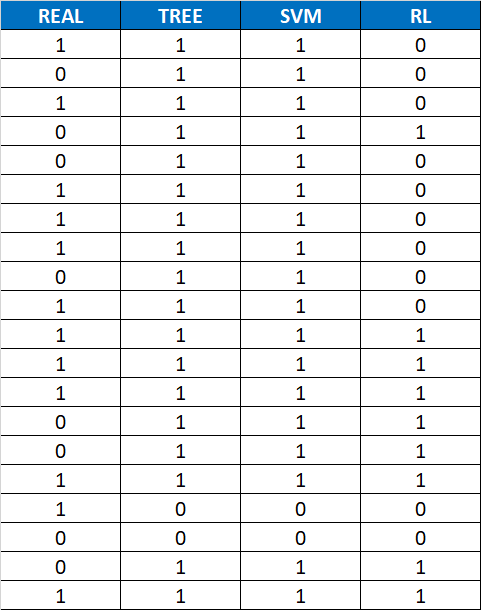

A continuación los datos de asertividad de la predicción de cada uno de los modelos con respecto a los datos reales:

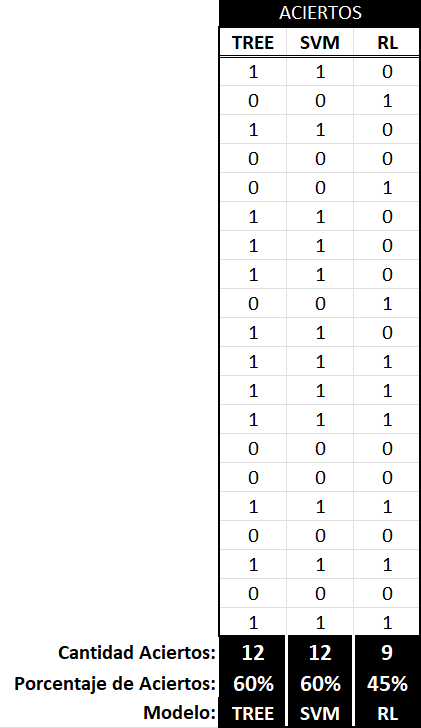

# **Conclusiones:**

* Los modelos que mejor prediccion tuvieron son: **"Arbol de Clasificación (Tree)"** y **"Maquina de Soporte Vectorial (SVM)"** acertando a más del **50%** de las predicciones sobre datos futuros.

* El modelo que menor prediccion tuvo es: **"Regresión Logistica (RL)"** acertando a menos del **50%** de las predicciones sobre datos futuros.

* Para futuros casos de estudio, el proceso de asignación de tipo de variables a los diferentes campos del dataset es recomendable hacerlo lo más al final posible, pues se pudo percibir que cada que se realizan operaciónes posterior a la asignación de tipos sobre los campos, los tipos previaente asignados se suelen perder.

* Para mejor acertividad de los módelos, se debe realizar ajuste sobre la construcción de la data procesada así:

 - **Trabajar con valores precisos y medidos de la ocurrencia presentada**, sin promediar y/o acumular los valores de las muestras climáticas (Temperatura, Precipitaciones y Velocidad del Viento), ya que al hacerlo se pierde en gran medida las condiciones precisas en las cuales se dió la falla sesgando la capacidad de correlacíón de las variables independientes con respecto a la dependiente y con ello la calidad de los modelos. Lo que se debe hacer es tomar la "foto" instantanea de los valores climatologicos al momento más exacto posible a la Fecha, Hora, Minuto y Segundo en que se presentó la falla.

  - **Trabajar, contruir, entrenar y desplegar los modelos inicialmente con un sólo municipío**, ya que al ttrabajar desde un iniciio con los 5 minucipios se puede generar sesgo por el desbalanceo de los datos toda vez que se tienen municipios con mayor cantidad de registros de ocurrencias de fallas que otros, data que los modelos deben procesar y toman "con el mismo peso". El ideal sería inicialmente trabajar con un sólo municipio (Salento; por ejemplo), seralizar el proceso con el mismo y luego replicar para los demás, teniendo un modelo por municipio.

  - **Realizar la busqueda y recopilación de más variables climatologicas** que nos permita contar con más caracteristicas del momento exacto donde da la ocurrencia de la falla.